<a href="https://colab.research.google.com/github/mohammadsadegh77/DataAnalyticsForFun/blob/main/COVID_19_detection_from_chest_X_ray_dataset_using_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
from tensorflow import keras
from keras import layers
from matplotlib import pyplot as plt
import os
%matplotlib inline



data_dir = "/content/drive/MyDrive/Dataset_Resized2"
image_size = (200, 200)

#new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
#plt.imshow(new_array,cmap='gray')
#plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import imghdr

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
image_class=['Not-Covid','COVID']

In [ ]:
data_class = os.listdir(data_dir)

In [ ]:
data_class

['Not-Covid-Resized', 'Corona-Resized']

In [ ]:

data_class.remove('.DS_Store')

ValueError: ignored

In [ ]:
for image_class in data_class:
    for image in (os.path.join(data_class, image_class)):
        image_path = os.path.join(data_class, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
               #os.remove(image_path)

TypeError: ignored

In [ ]:
#train_ds = tf.keras.preprocessing.image_dataset_from_directory(
 #   data_dir,
  #  validation_split=0.2,
  #  subset="training",
   # seed=42,
   # image_size=image_size,
   # batch_size=32,
   # labels="inferred",
   # label_mode="binary",
   # class_names=None,
   # color_mode="rgb",
   # shuffle=True,
#)


dataset = tf.keras.preprocessing.image_dataset_from_directory(
     data_dir,
     labels="inferred",
     label_mode="binary",
     class_names=None,
     color_mode="rgb",
     batch_size=30,
     image_size=image_size,
     shuffle=True,
     seed=42,
     validation_split=None,
     subset=None,
     interpolation="bilinear",
 )


#val_ds = tf.keras.preprocessing.image_dataset_from_directory(
 #   data_dir,
  # subset="validation",
  #  seed=42,
  #  image_size=image_size,
  #  batch_size=32,
#)








Found 3000 files belonging to 2 classes.


In [ ]:
dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [ ]:
from sklearn.model_selection import train_test_split

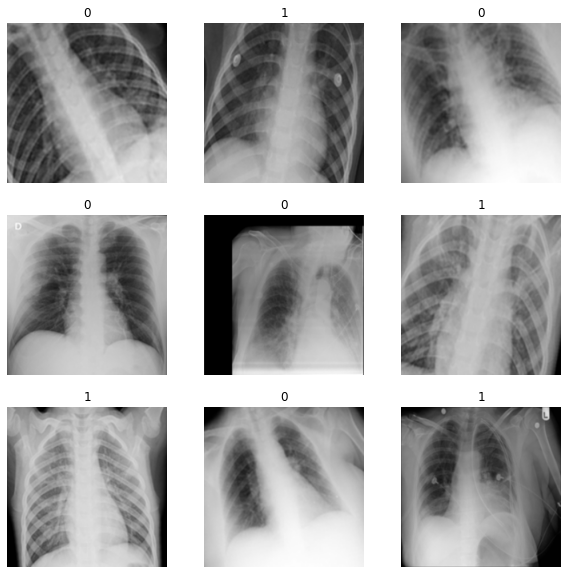

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
##Not-Covid=1& Covid=0

In [ ]:
data = dataset.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[3.52484703e-01, 3.52484703e-01, 3.52484703e-01],
          [3.54781181e-01, 3.54781181e-01, 3.54781181e-01],
          [3.48941147e-01, 3.48941147e-01, 3.48941147e-01],
          ...,
          [1.93725489e-02, 1.93725489e-02, 1.93725489e-02],
          [1.93725489e-02, 1.93725489e-02, 1.93725489e-02],
          [1.93725489e-02, 1.93725489e-02, 1.93725489e-02]],
 
         [[3.42509776e-01, 3.42509776e-01, 3.42509776e-01],
          [3.47734898e-01, 3.47734898e-01, 3.47734898e-01],
          [3.39450985e-01, 3.39450985e-01, 3.39450985e-01],
          ...,
          [1.35686267e-02, 1.35686267e-02, 1.35686267e-02],
          [1.35686267e-02, 1.35686267e-02, 1.35686267e-02],
          [1.35686267e-02, 1.35686267e-02, 1.35686267e-02]],
 
         [[3.24870557e-01, 3.24870557e-01, 3.24870557e-01],
          [3.29992175e-01, 3.29992175e-01, 3.29992175e-01],
          [3.26274484e-01, 3.26274484e-01, 3.26274484e-01],
          ...,
          [2.74509820e-03, 2.74509820e-03, 2.7450

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.1)
test_size = int(len(data)*.2)

In [ ]:
print(train_size,val_size,test_size)

70 10 20


In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, BatchNormalization ,AveragePooling2D


import matplotlib.pyplot as plt





In [ ]:
model = Sequential()


In [ ]:
model.add(Conv2D(32, (3,3), 1, activation='relu',padding="same", input_shape=(200,200,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), 1, activation='relu',padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), 1, activation='relu',padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), 1, activation='relu',padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), 1, activation='relu',padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), 1, activation='relu',padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))


model.add(Flatten())




model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.005)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 batch_normalization_7 (Batc  (None, 200, 200, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 200, 200, 32)      9248      
                                                                 
 batch_normalization_8 (Batc  (None, 200, 200, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                      

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint("model-{epoch:03d}-{accuracy}-{val_accuracy}.h5",save_best_only=True,monitor="val_accuracy")




In [ ]:
hist = model.fit(train, epochs=50, callbacks=[checkpoint],validation_data=val)




Epoch 1/50
70/70 [==============================] - 737s 10s/step - loss: 0.6309 - accuracy: 0.7524 - val_loss: 0.6267 - val_accuracy: 0.6967
Epoch 2/50
70/70 [==============================] - 725s 10s/step - loss: 0.4703 - accuracy: 0.7990 - val_loss: 1.0429 - val_accuracy: 0.6800
Epoch 3/50
70/70 [==============================] - 721s 10s/step - loss: 0.4753 - accuracy: 0.7976 - val_loss: 1.3186 - val_accuracy: 0.5200
Epoch 4/50
70/70 [==============================] - 720s 10s/step - loss: 0.3829 - accuracy: 0.8395 - val_loss: 0.6195 - val_accuracy: 0.6900
Epoch 5/50
70/70 [==============================] - 720s 10s/step - loss: 0.3584 - accuracy: 0.8543 - val_loss: 0.4991 - val_accuracy: 0.7567
Epoch 6/50
70/70 [==============================] - 716s 10s/step - loss: 0.3193 - accuracy: 0.8652 - val_loss: 0.5551 - val_accuracy: 0.7300
Epoch 7/50
70/70 [==============================] - 714s 10s/step - loss: 0.2528 - accuracy: 0.8933 - val_loss: 0.4732 - val_accuracy: 0.8067
Epoch 

In [ ]:
print(hist.history)
best_score = max(hist.history['val_accuracy'])

print(best_score)

{'loss': [0.5835294127464294, 0.4916072189807892, 0.3927864134311676, 0.37257248163223267, 0.3160867989063263, 0.27993693947792053, 0.25390535593032837, 0.22062654793262482, 0.26251477003097534, 0.24954825639724731, 0.22130048274993896, 0.17888516187667847, 0.15166756510734558, 0.13556614518165588, 0.11637433618307114, 0.11742793768644333, 0.09651319682598114, 0.09092272073030472, 0.11136604845523834, 0.0813710168004036, 0.07806490361690521, 0.05558989942073822, 0.05992165952920914, 0.047473203390836716, 0.049765631556510925, 0.04912494122982025, 0.07034217566251755, 0.0811341181397438, 0.06448591500520706, 0.04548680782318115, 0.044940534979104996, 0.060327909886837006, 0.10927875339984894, 0.14772175252437592, 0.07952600717544556, 0.0788332000374794, 0.06215968355536461, 0.04181253910064697, 0.0416567288339138, 0.03991135209798813, 0.03327402099967003, 0.03680272027850151, 0.02870059758424759, 0.04751105234026909, 0.027679188176989555, 0.03614488244056702, 0.03170756250619888, 0.0282

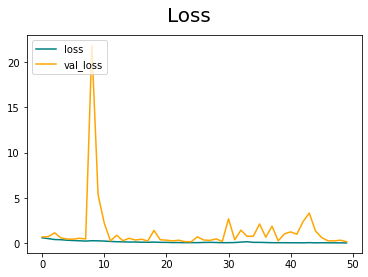

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

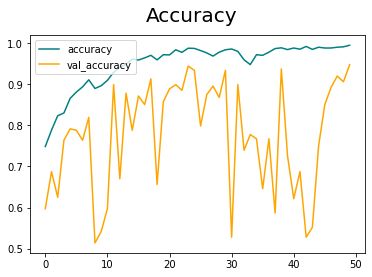

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.97183096, shape=(), dtype=float32) tf.Tensor(0.89032257, shape=(), dtype=float32) tf.Tensor(0.9270833, shape=(), dtype=float32)


In [ ]:
test_size

9

In [ ]:
for n in yhat :
  if yhat.all() > 0.5:
    print(f'Predicted class is Not-Covid')
  else:
    print(f'Predicted class is Covid')

Predicted class is Not-Covid
Predicted class is Not-Covid
Predicted class is Not-Covid
Predicted class is Not-Covid
Predicted class is Not-Covid
Predicted class is Not-Covid
Predicted class is Not-Covid
Predicted class is Not-Covid
Predicted class is Not-Covid
Predicted class is Not-Covid
Predicted class is Not-Covid
Predicted class is Not-Covid
Predicted class is Not-Covid
Predicted class is Not-Covid
Predicted class is Not-Covid
Predicted class is Not-Covid
Predicted class is Not-Covid
Predicted class is Not-Covid
Predicted class is Not-Covid
Predicted class is Not-Covid
Predicted class is Not-Covid
Predicted class is Not-Covid
Predicted class is Not-Covid
Predicted class is Not-Covid
Predicted class is Not-Covid
Predicted class is Not-Covid
Predicted class is Not-Covid
Predicted class is Not-Covid
Predicted class is Not-Covid
Predicted class is Not-Covid
Predicted class is Not-Covid
Predicted class is Not-Covid


In [ ]:
model.evaluate(test)

9/9 [==============================] - 7s 48ms/step - loss: 0.2432 - accuracy: 0.9410


[0.2432074248790741, 0.9409722089767456]

In [ ]:
val_loss,val_acc=model.evaluate(test)
print(val_loss,val_acc)

9/9 [==============================] - 7s 48ms/step - loss: 0.2025 - accuracy: 0.9340
0.20254036784172058 0.9340277910232544
